In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_excel('C:/Users/admin/Downloads/Flight Fare Prediction Project/dataset/Data_Train.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
# Checking the dataset
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# As you can see above there are three types of data
# 1. Categorical Data
# 2. Date/Time Data i.e. Temporal Data
# 3. Numeric Data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis

In [5]:
# We will be droping the Route column because we have the Source, Destination and Total_Stops columns
# We will be droping the Additional_Route column because it will not be required in any prediction
dataset = dataset.drop('Route', axis=1)
dataset = dataset.drop('Additional_Info', axis=1)

In [6]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [7]:
# Lets find out the nan values first
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [8]:
# So, here only Total_Stops have one Nan value
# We an drop the row of that nan value because it will not affect the data very much
dataset.dropna(axis=0, inplace=True)

## Handling Temporal Data

In [9]:
# Date_of_Journey
# Dividing it into 2 parts, Journey_Day and Joureny_Month. It is a dataset for the same year, so not extracting year from this column 
dataset['Journey_Day'] = pd.to_datetime(dataset['Date_of_Journey'], format='%d/%m/%Y').dt.day
dataset['Journey_Month'] = pd.to_datetime(dataset['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [10]:
# Dep_Time, Departure Time
# Dividing it into 2 parts, Departure_Hour and Departure_Minute
dataset['Departure_Hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['Departure_Minute'] = pd.to_datetime(dataset['Dep_Time']).dt.minute

In [11]:
# Doing same as above with Arrival_Time
dataset['Arrival_Hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['Arrival_Minute'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute

In [12]:
# Dealing with the Duration Column
# Here the data is in the form of h m, so we have to define a function to seperate them and making them into Duration_hour and Duration_minute

# Dealing with hours in Duration of flight
def duration_hours(x):
    hours = 0
    if "h" in x:
        hours += int(x.split("h")[0])
    return hours

# Dealing with minutes in DUration of flight
def duration_minutes(y):
    minutes = 0
    if "m" in y and "h" in y:
        minutes += int(y.split("h")[1].split("m")[0])
    return minutes

In [13]:
dataset['Duration_hour'] = dataset['Duration'].apply(duration_hours)
dataset['Duration_minutes'] = dataset['Duration'].apply(duration_minutes)

In [14]:
# Dealing with the Total_Stops 
# non-stop:0
# 1-stop:1
# 2-stop:2
# 3-stop:3

dataset['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

## Exploring the Airline, Source and Total_Stops with Price

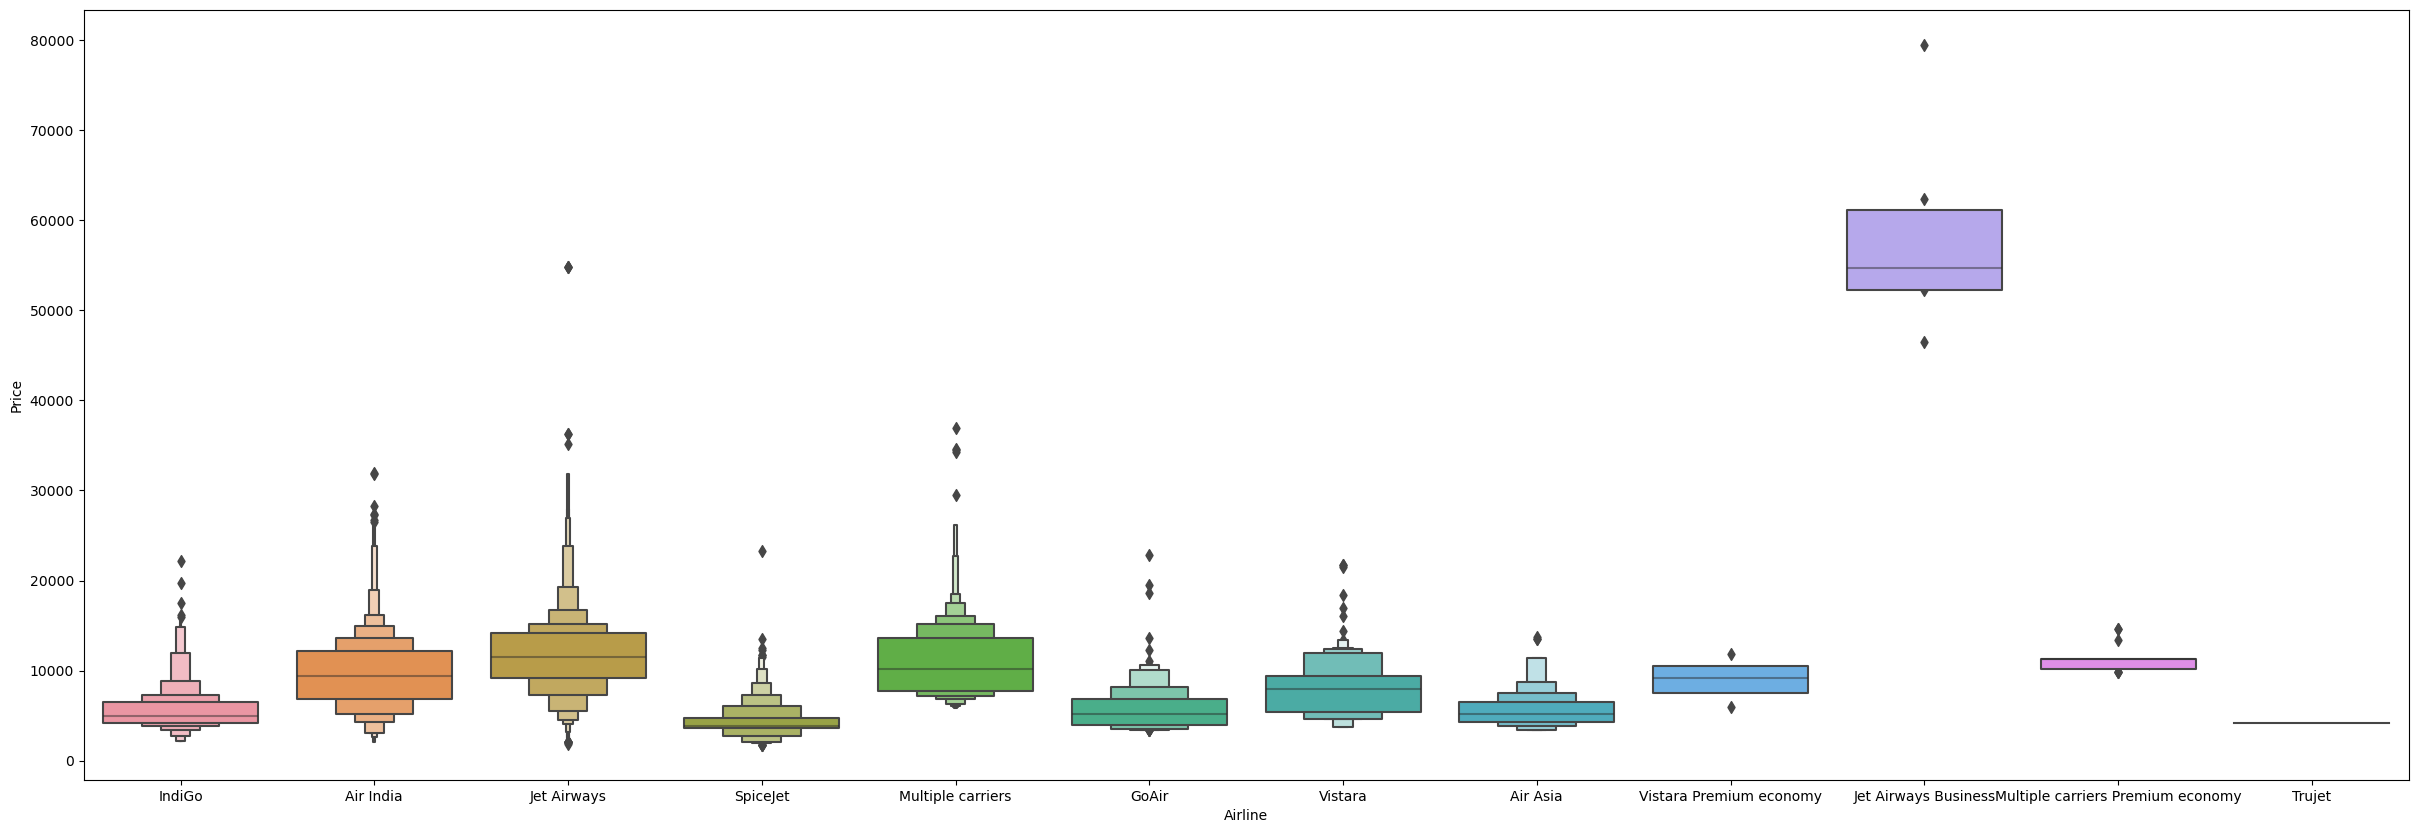

In [15]:
plt.figure(figsize=(30, 10))
sns.boxenplot(x='Airline', y='Price', data=dataset)
plt.show()
# Here we can see the graph of Airline and Price
# The black dots are the outliers in the graph


In [16]:
# You can see all the names here
# The highest median line is of Jet Airwyas business class
# The Jet Airwyas business class is the most expensive one in the whole column
# The least expensive one are SPicejet and Trujet
dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

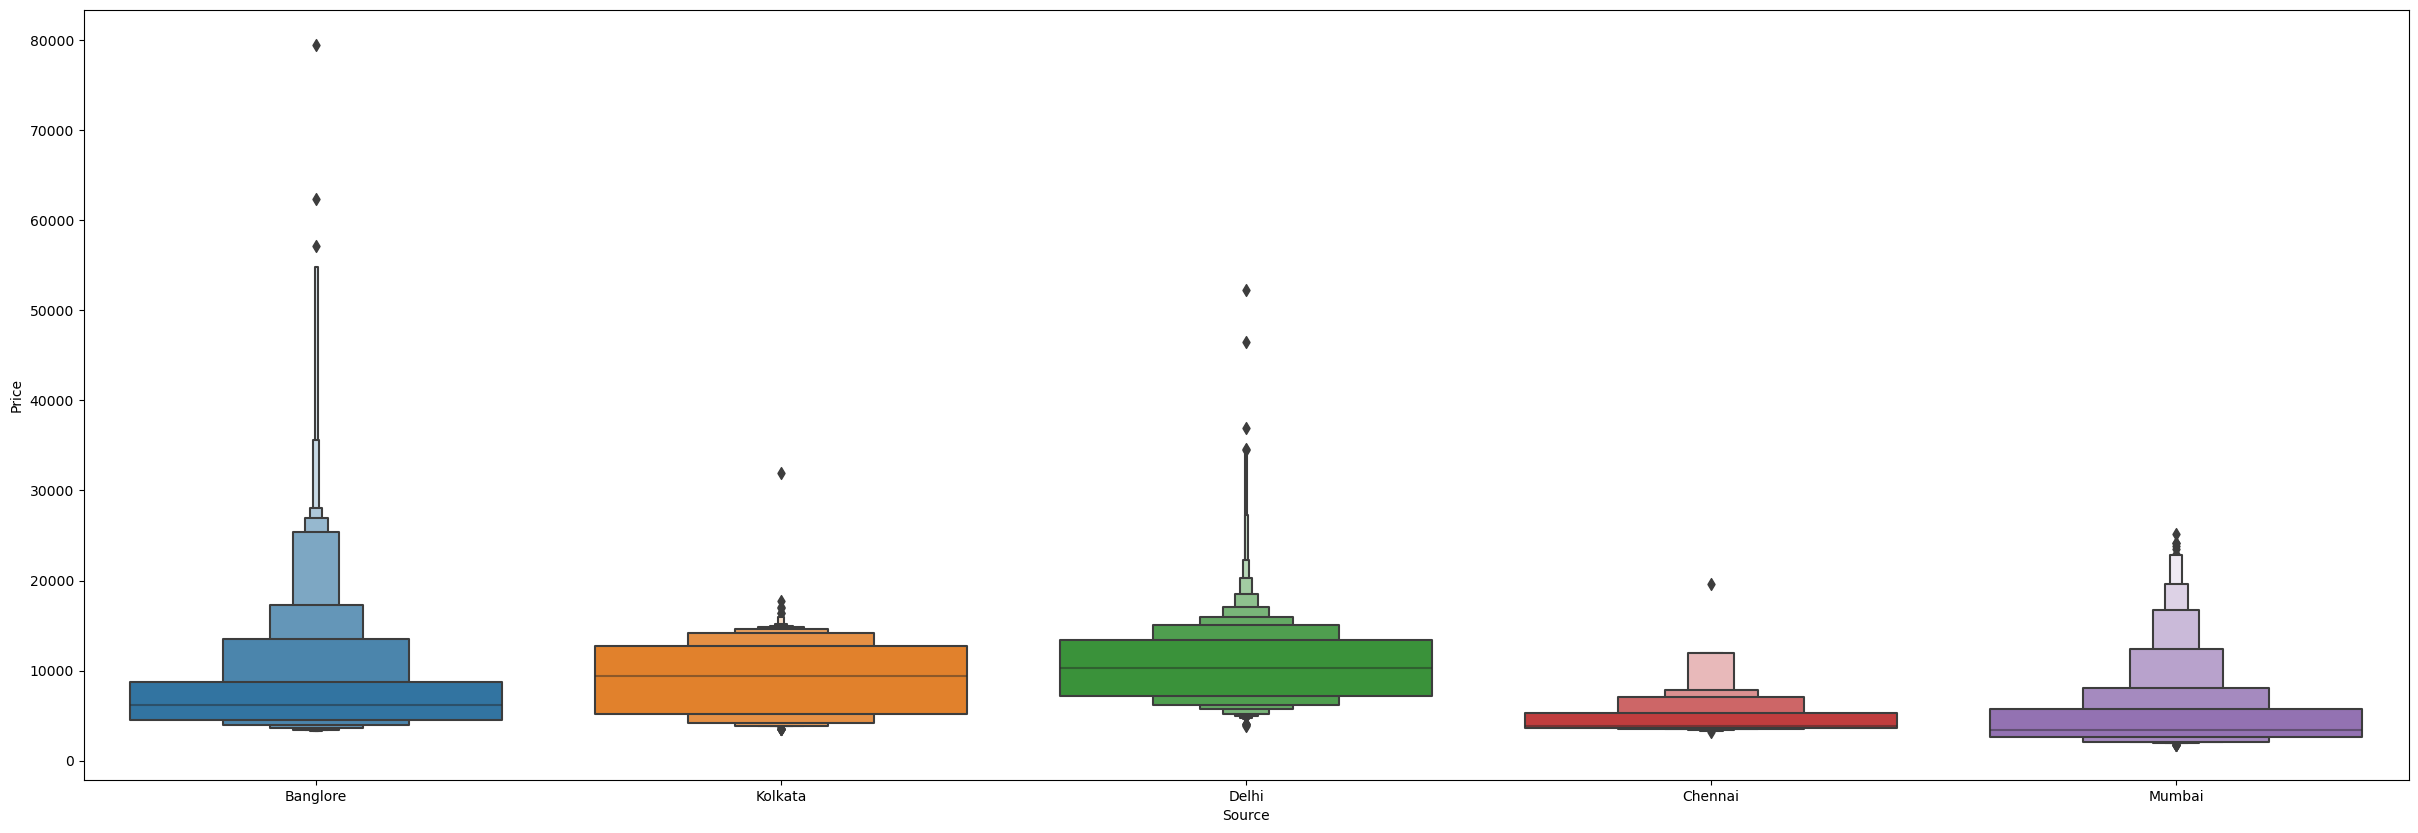

In [17]:
plt.figure(figsize=(30, 10))
sns.boxenplot(x='Source', y='Price', data=dataset)
plt.show()
# Here we can see the graph of Source and Price
# The black dots are the outliers in the graph

In [18]:
# You can see all the names here
# The highest median line here is of Delhi
# The ticket from Delhi is most expensive
# The ticket from Chennai is least expensive
dataset['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

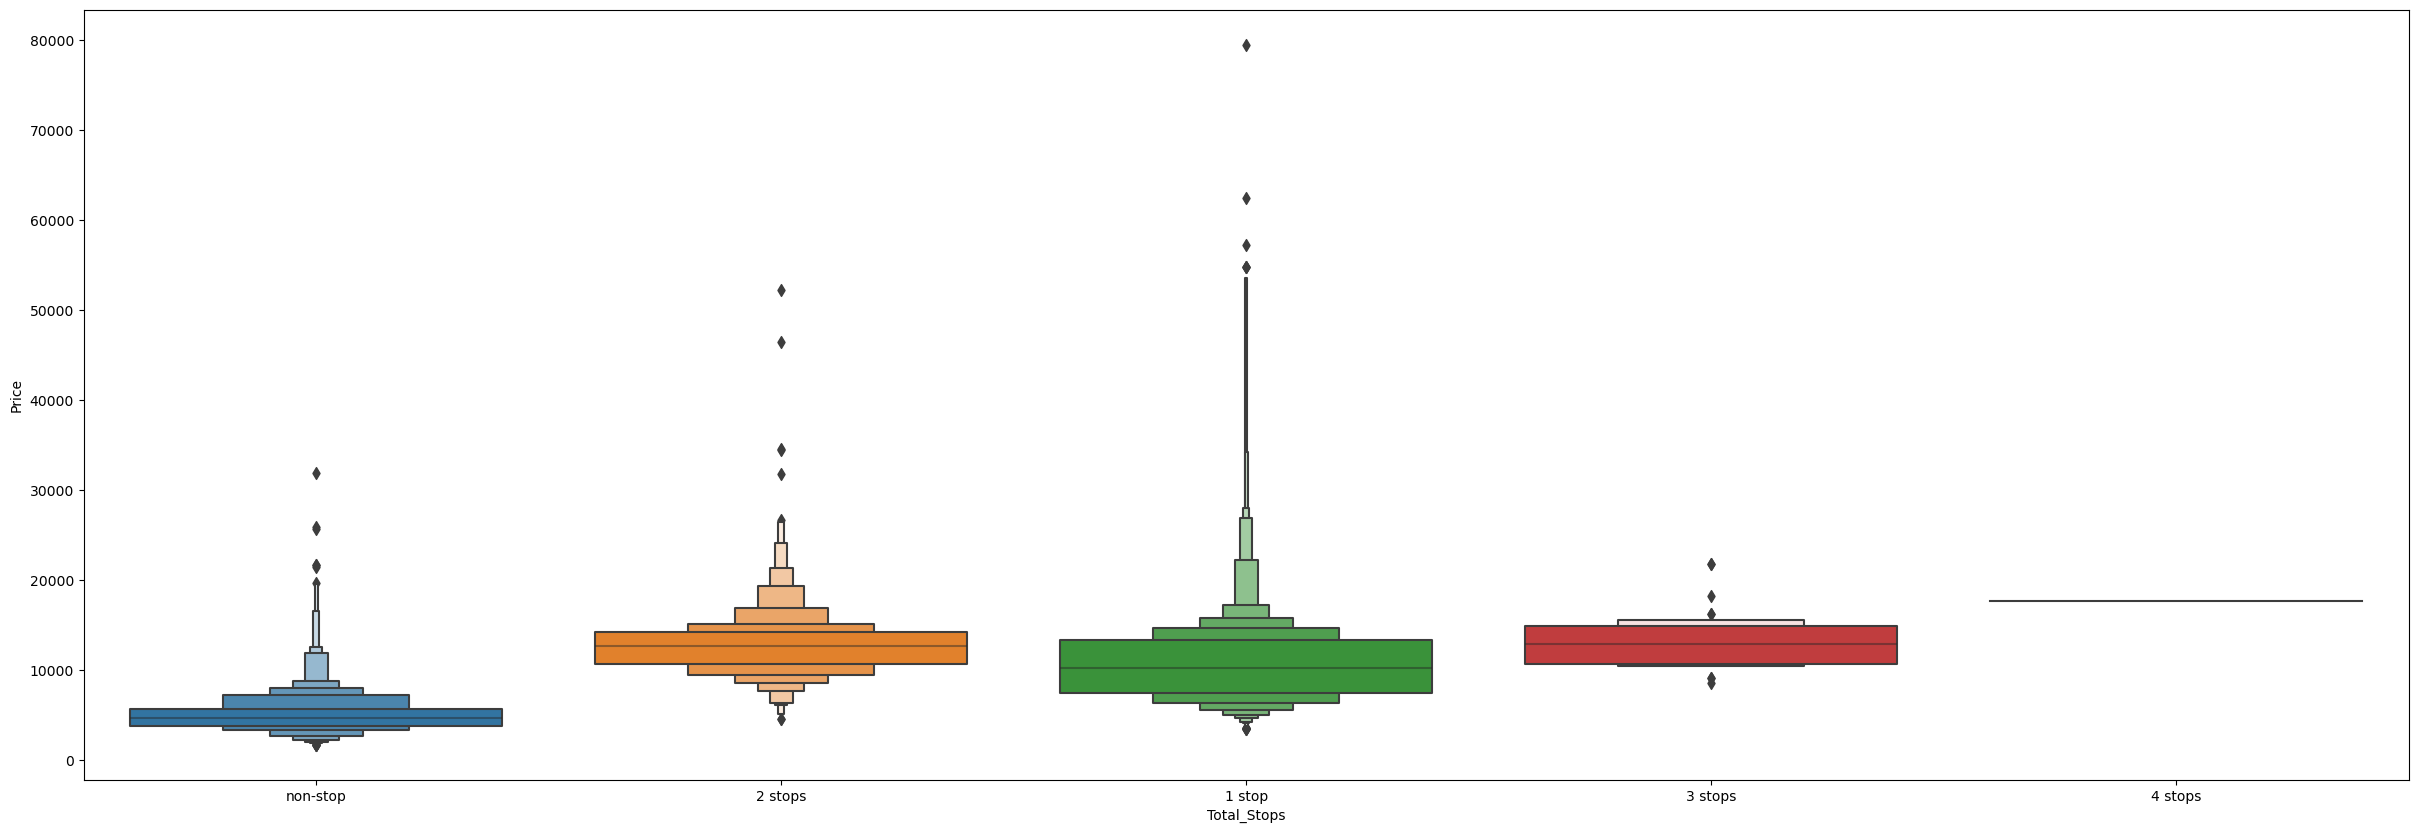

In [19]:
plt.figure(figsize=(30, 10))
sns.boxenplot(x='Total_Stops', y='Price', data=dataset)
plt.show()
# Here we can see the graph of Destination and Price
# The black dots are the outliers in the graph
# Here, surprisingly we are getting expensive flights which has 4 stops 

## Handling Categorical Data

In [20]:
# Doing OneHotEncoding of Total_Stops by making dummy variables and dropping the first variable
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [30]:
# Doing OneHotEncoding of Airline by making dummy variables and dropping the first variable
Airline = dataset[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
# Dropped Trujet AIrlines because it is not present in the Test set. It will not be able to predict from Test set.
Airline=Airline.drop(['Airline_Trujet'], axis=1)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [32]:
# Doing OneHotEncoding of Source by making dummy variables and dropping the first variable
Source = dataset[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
# Doing OneHotEncoding of Destination by making dummy variables and dropping the first variable
Destination = dataset[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
# Now, dropping the unprocessed columns of the dataset
dataset.drop(["Airline", "Source", "Destination", "Dep_Time", "Duration", "Arrival_Time", "Date_of_Journey"], axis = 1, inplace = True)

In [35]:
dataset.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minutes
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [36]:
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1)
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
data_train.shape

(10682, 29)

In [38]:
data_train.to_csv('C:/Users/admin/Downloads/Flight Fare Prediction Project/dataset/Train_Preprocessed.csv')